#**EDA - 1**

#**About - Dataset:**

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

**Title: Bike Details Dataset**

**Source:**

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


**Description:**

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

**Title: Bike Details**

- =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
- selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
- year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
 -  seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
-  owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
- km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
- ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

#Import csv file

In [2]:
from google.colab import files
uploaded = files.upload()


Saving BIKE DETAILS (1).csv to BIKE DETAILS (1).csv


#**QUESTION -1 What is the range of selling prices in the dataset?**

In [ ]:
min_selling_price = df['selling_price'].min()
max_selling_price = df['selling_price'].max()

print(f"Minimum Selling Price: {min_selling_price}")
print(f"Maximum Selling Price: {max_selling_price}")

Minimum Selling Price: 5000
Maximum Selling Price: 760000


#**QUESTION -2 What is the median selling price for bikes in the dataset?**

In [ ]:
median_selling_price = df['selling_price'].median()

print(f"Median Selling Price: {median_selling_price}")

Median Selling Price: 45000.0


#**QUESTION - 3 What is the most common seller type?**

In [ ]:
most_common_seller_type = df['seller_type'].mode()[0]
print(f"The most common seller type is: {most_common_seller_type}")

The most common seller type is: Individual


#**QUESTION - 4 How many bikes have driven more than 50,000 kilometers?**

In [ ]:
bikes_over_50k_km = df[df['km_driven'] > 50000]
num_bikes_over_50k_km = len(bikes_over_50k_km)

print(f"Number of bikes driven more than 50,000 kilometers: {num_bikes_over_50k_km}")

Number of bikes driven more than 50,000 kilometers: 170


#**QUESTION - 5 What is the average km_driven value for each ownership type?**

In [ ]:
average_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven value for each ownership type:")
print(average_km_driven_by_owner)

Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


#**QUESTION - 6 What proportion of bikes are from the year 2015 or older?**

#**QUESTION - 7 What is the trend of missing values across the dataset**

In [ ]:
missing_values = df.isnull().sum()
percentage_missing = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

missing_info = missing_info.sort_values(by='Percentage Missing', ascending=False)

print("Missing Values Information:")
print(missing_info)

Missing Values Information:
                   Missing Values  Percentage Missing
ex_showroom_price             435           40.999057
selling_price                   0            0.000000
name                            0            0.000000
year                            0            0.000000
seller_type                     0            0.000000
owner                           0            0.000000
km_driven                       0            0.000000


#**QUESTION - 8 What is the highest ex_showroom_price recorded, and for which bike?**

In [ ]:
max_ex_showroom_price = df['ex_showroom_price'].max()
print(f"Maximum Ex-Showroom Price: {max_ex_showroom_price}")


bike_with_max_price = df[df['ex_showroom_price'] == max_ex_showroom_price]
print("Bike with the highest ex_showroom_price:")
print(bike_with_max_price[['name', 'ex_showroom_price']])



Maximum Ex-Showroom Price: 1278000.0
Bike with the highest ex_showroom_price:
                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


#**QUESTION - 9 What is the total number of bikes listed by each seller type?**

In [ ]:
bikes_by_seller_type = df['seller_type'].value_counts()

print("Total number of bikes listed by each seller type:")
print(bikes_by_seller_type)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


#**QUESTION - 10 What is the relationship between selling_price and km_driven for first-owner bikes?**

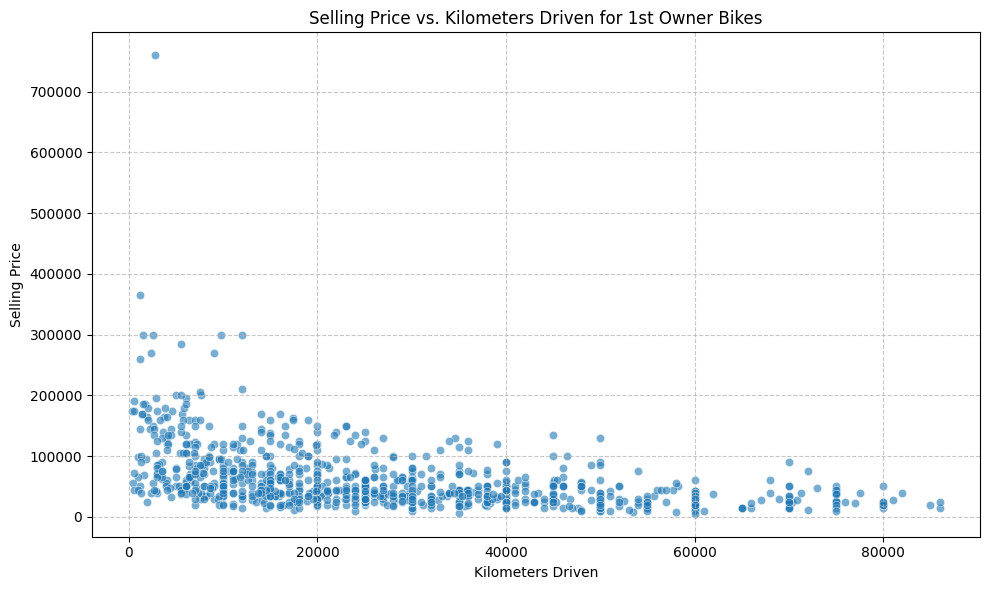

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define first_owner_bikes by filtering the main DataFrame
first_owner_bikes = df[df['owner'] == '1st owner']

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes, alpha=0.6)
plt.title('Selling Price vs. Kilometers Driven for 1st Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 11 Identify and remove outliers in the km_driven column using the IQR method**

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'km_driven'
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

# Store original shape before removing outliers
original_df_shape = df.shape

# Remove outliers from the DataFrame
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Original DataFrame shape: {original_df_shape}")
print(f"DataFrame shape after outlier removal: {df.shape}")

print("DataFrame 'df' has been updated with outliers removed from 'km_driven'.")

Q1 (25th percentile): 13000.0
Q3 (75th percentile): 40000.0
IQR: 27000.0
Lower Bound for Outliers: -27500.0
Upper Bound for Outliers: 80500.0
Original DataFrame shape: (1022, 7)
DataFrame shape after outlier removal: (1015, 7)
DataFrame 'df' has been updated with outliers removed from 'km_driven'.


#**QUESTION - 12 Perform a bivariate analysis to visualize the relationship between year and selling_price**

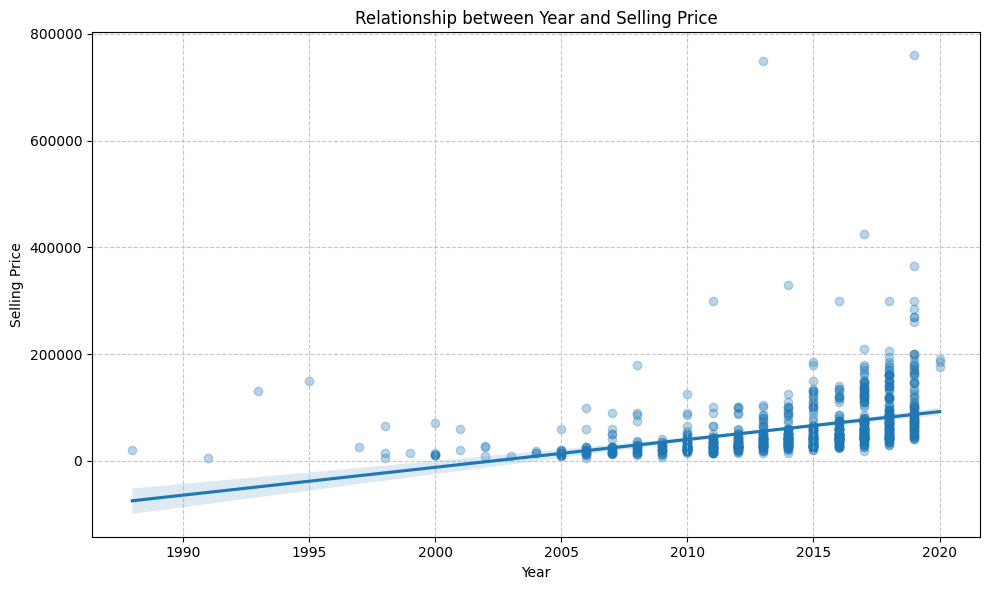

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='selling_price', data=df, scatter_kws={'alpha':0.3})
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 15 Develop a correlation matrix for numeric columns and visualize it using a heatmap**

Correlation Matrix:


,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.389686,-0.403412,0.919798
year,0.389686,1.000000,-0.462554,0.119761
km_driven,-0.403412,-0.462554,1.000000,-0.206749
ex_showroom_price,0.919798,0.119761,-0.206749,1.000000


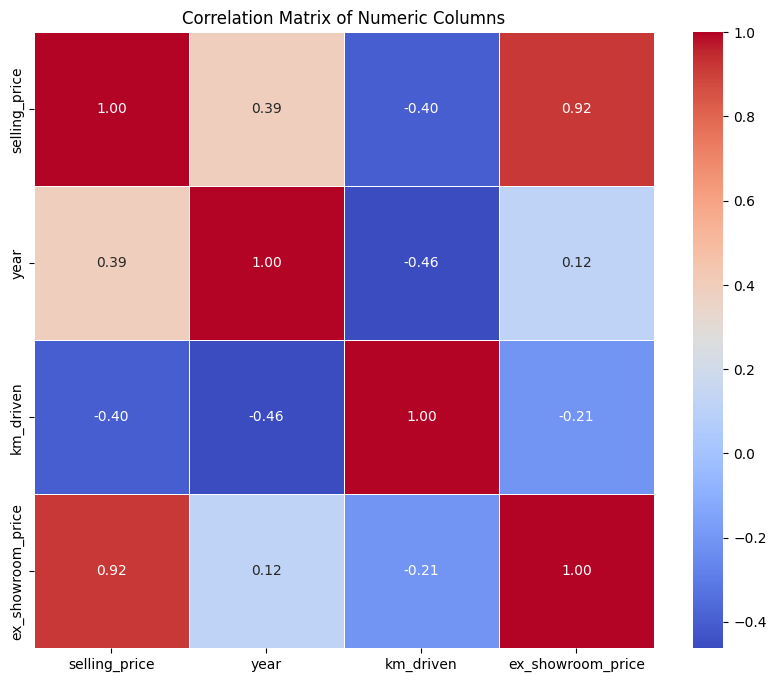

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

print("Correlation Matrix:")
display(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


#**EDA - 1 IS COMPLETED**

#**EDA - 2**

**About - Dataset:**

**Source:**

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.


**Description:**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

#**Features:**
- Car_id: A unique identifier for each car in the dataset, helping to track individual car entries

 - Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD

 - Customer Name: The name of the customer who purchased the car, represented as a string
 - Gender: The gender of the customer, categorized as "Male" or "Female.
- Annual Income: The customer's annual income in US dollars, represented as a numeric value
- Dealer_Name: The name of the dealership selling the car, represented as a string
- Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc

- Model: The specific model name of the car, such as "Corolla," "Civic," etc
- Engine: The engine type of the car, such as "V6," "I4," etc
- Transmission: The type of transmission in the car, either "Manual" or "Automatic.
- Color: The color of the car, represented as a string (e.g., "Red," "Blue").
- Price ($): The selling price of the car in US dollar
- Dealer_No: A unique identifier for each car dealer in the dataset
- Body Style: The body style of the car, such as "Sedan," "SUV," et
- Phone: The phone number of the customer who purchased the car
- Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

#**Import csv file**

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Car Sale.csv to Car Sale.csv


#**DISPLAY FIRST FIVE ROWS**

In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Car Sale.csv']))
print(df.head()) # Optional: display the first 5 rows


         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

#**QUESTION -01 What is the average selling price of cars for each dealer, and how does it compare across different dealer?**

In [ ]:
average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()

print("Average selling price of cars for each dealer:")
print(average_price_by_dealer)

print("\n--- Comparison across different dealers ---")
print("The output above shows the average selling price for each unique dealer. You can compare these values directly to see which dealers tend to sell cars at higher or lower average prices. For instance, you can sort the results to easily identify the highest and lowest average prices among dealers:")
print(average_price_by_dealer.sort_values(ascending=False))

Average selling price of cars for each dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                               

#**QUESTION - 2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**

In [ ]:
price_variation_by_company = df.groupby('Company')['Price ($)'].std()

print("Price variation (standard deviation) by Company:")
print(price_variation_by_company)

Price variation (standard deviation) by Company:
Company
Acura          8183.046414
Audi          12904.243867
BMW           15065.578723
Buick         17142.232626
Cadillac      19517.120220
Chevrolet     13311.063223
Chrysler      11583.286811
Dodge         11187.592085
Ford          15849.090227
Honda         11148.629062
Hyundai        3485.982649
Infiniti      13696.332844
Jaguar        10222.531533
Jeep           9459.834418
Lexus         17852.923492
Lincoln       19658.050211
Mercedes-B    15722.807459
Mercury       16445.172195
Mitsubishi    11671.343035
Nissan        16214.264017
Oldsmobile    15711.345857
Plymouth      19065.997338
Pontiac       14348.963592
Porsche        5261.839206
Saab          19653.740089
Saturn        15990.223671
Subaru        12920.771620
Toyota        15367.131714
Volkswagen    12527.124011
Volvo         12933.790185
Name: Price ($), dtype: float64


In [ ]:
highest_variation_company = price_variation_by_company.idxmax()
max_variation_value = price_variation_by_company.max()

print(f"The car brand with the highest price variation is: {highest_variation_company}")
print(f"The highest price variation (standard deviation) is: {max_variation_value:.2f}")


The car brand with the highest price variation is: Lincoln
The highest price variation (standard deviation) is: 19658.05


#**QUESTION - 3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**

In [ ]:
transmission_price_stats = df.groupby('Transmission')['Price ($)'].agg([
    'mean',
    'median',
    'std',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75)
]).rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'})

transmission_price_stats['IQR'] = transmission_price_stats['Q3'] - transmission_price_stats['Q1']

print("Price distribution for each transmission type:")
print(transmission_price_stats)

Price distribution for each transmission type:
                      mean   median           std       Q1       Q3      IQR
Transmission                                                                
Auto          28248.525972  24000.0  13747.070597  19000.0  35500.0  16500.0
Manual        27914.710631  22001.0  15862.871978  17000.0  34000.0  17000.0


In [ ]:
iqr_by_transmission = transmission_price_stats['IQR']

print("Interquartile Ranges (IQR) for each transmission type:")
print(iqr_by_transmission)

Interquartile Ranges (IQR) for each transmission type:
Transmission
Auto      16500.0
Manual    17000.0
Name: IQR, dtype: float64


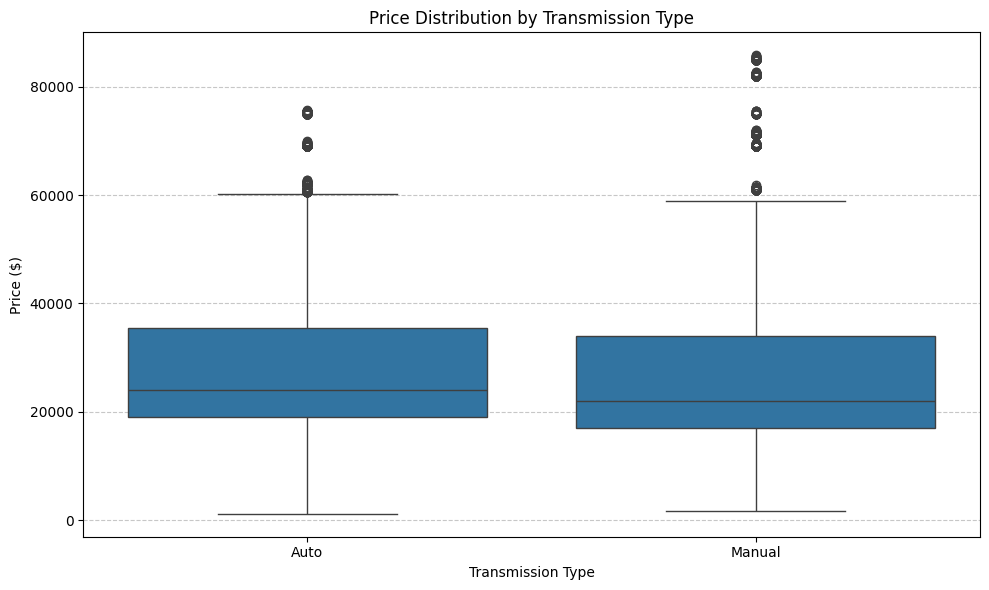

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 4 What is the distribution of car prices across different regions?**

In [ ]:
region_price_stats = df.groupby('Dealer_Region')['Price ($)'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75)
]).rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'})

region_price_stats['IQR'] = region_price_stats['Q3'] - region_price_stats['Q1']

print("Price distribution for each dealer region:")
print(region_price_stats)

Price distribution for each dealer region:
                       mean   median           std   min    max       Q1  \
Dealer_Region                                                              
Aurora         28334.626837  23000.0  15026.207252  9000  85800  18001.0   
Austin         28341.603628  23801.0  14903.884549  9000  85601  18001.0   
Greenville     28180.819054  22500.0  15101.538328  1200  85200  18001.0   
Janesville     27833.350955  23000.0  14344.995638  4300  85400  18001.0   
Middletown     27856.338875  22750.0  14619.842395  1700  85300  18000.0   
Pasco          28119.039923  23000.0  14659.315941  9000  85600  18500.5   
Scottsdale     27954.958928  22600.0  14902.916820  1450  85001  18000.0   

                    Q3      IQR  
Dealer_Region                    
Aurora         35000.0  16999.0  
Austin         35001.0  17000.0  
Greenville     34500.0  16499.0  
Janesville     34000.0  15999.0  
Middletown     34000.0  16000.0  
Pasco          34000.0  15499.5  


/tmp/ipython-input-3487575017.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='viridis')


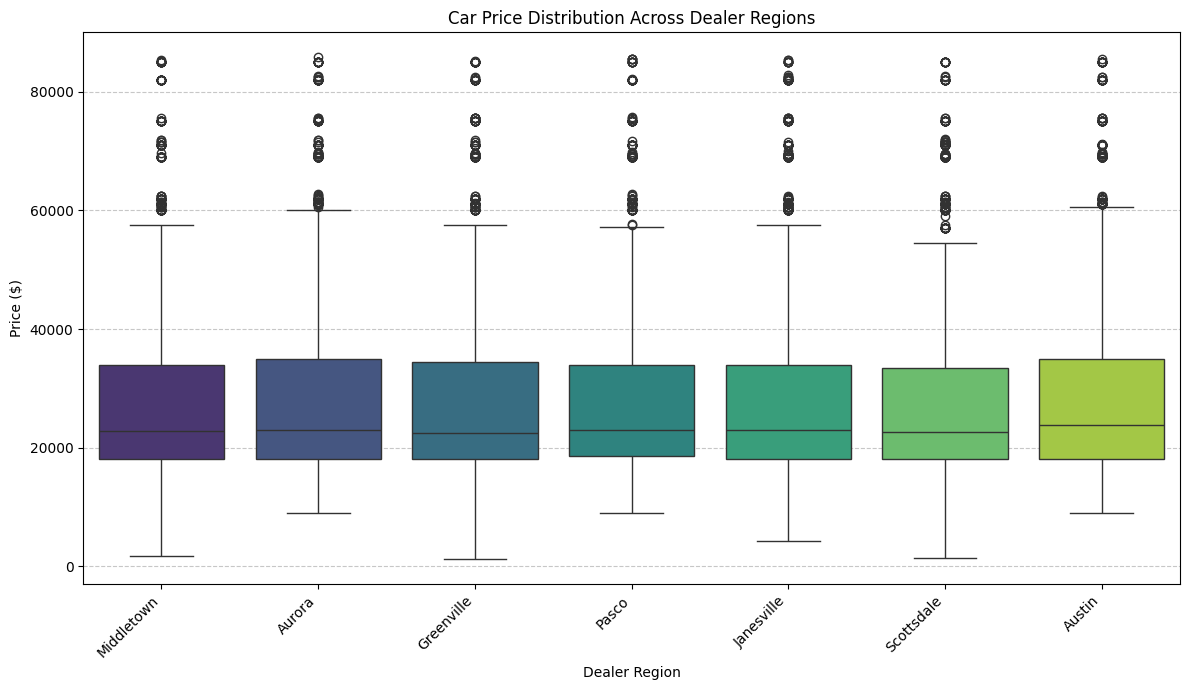

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='viridis')
plt.title('Car Price Distribution Across Dealer Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 5 What is the distribution of cars based on body styles?**

#**QUESTION - 6 How does the average selling price of cars vary by customer gender and annual income?**

In [ ]:
import numpy as np

# Define bin edges for 'Annual Income'
# Using 0, 50000, 100000, and the maximum annual income as cut-off points.
# The max value will be dynamic to ensure all incomes are covered.
# Adding a check for the max value in case it's lower than 100000
max_income = df['Annual Income'].max()

# Adjust bins if max_income is unexpectedly low
if max_income < 100000:
    bins = [0, 50000, max_income + 1] # Add 1 to max_income to ensure max is included if right=False
    labels = ['Low', 'Medium']
elif max_income < 50000:
    bins = [0, max_income + 1]
    labels = ['Low']
else:
    bins = [0, 50000, 100000, max_income + 1] # Add 1 to max_income to ensure max is included if right=False
    labels = ['Low', 'Medium', 'High']

# Create 'Income_Category' column using pd.cut()
df['Income_Category'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, right=False, include_lowest=True)

print("Bins used:", bins)
print("Labels used:", labels)
print("New 'Income_Category' column created. Displaying the value counts:")
print(df['Income_Category'].value_counts())
print("\nFirst 5 rows with new 'Income_Category' column:")
print(df[['Annual Income', 'Income_Category']].head())

Bins used: [0, 50000, 100000, 11200001]
Labels used: ['Low', 'Medium', 'High']
New 'Income_Category' column created. Displaying the value counts:
Income_Category
High      18630
Low        5275
Medium        1
Name: count, dtype: int64

First 5 rows with new 'Income_Category' column:
   Annual Income Income_Category
0          13500             Low
1        1480000            High
2        1035000            High
3          13500             Low
4        1465000            High


/tmp/ipython-input-632276073.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_gender_income = df.groupby(['Gender', 'Income_Category'])['Price ($)'].mean().unstack()


Average selling price by Gender and Income Category:
Income_Category           Low   Medium          High
Gender                                              
Female           28132.038732      NaN  28318.800352
Male             27816.302247  43000.0  28101.413494


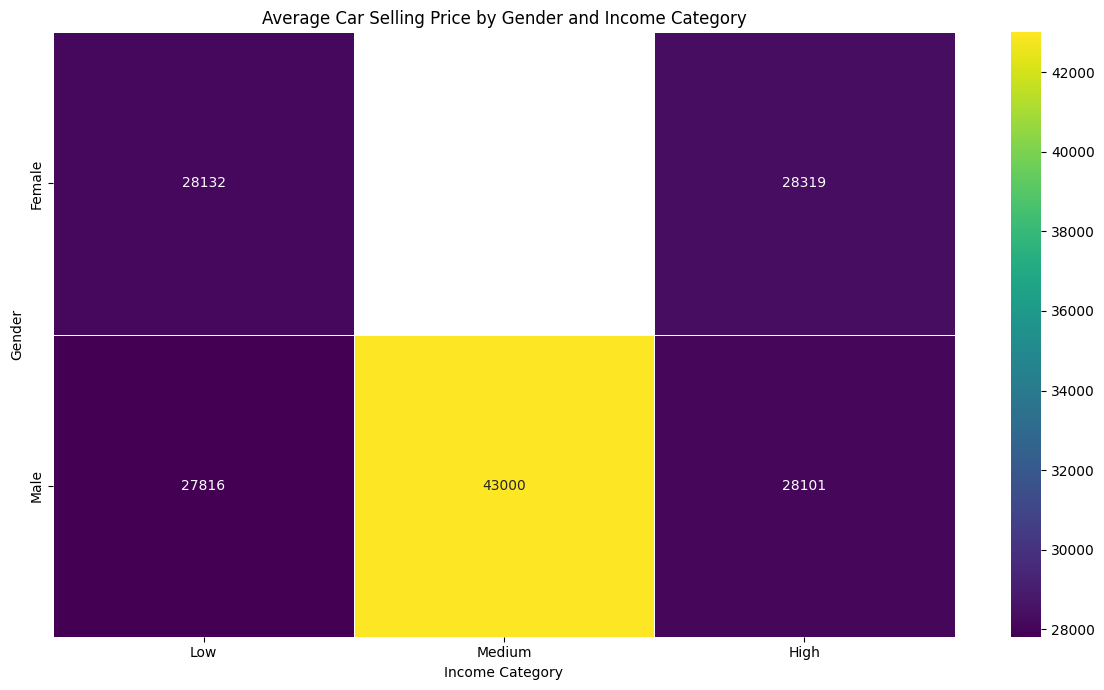

<Figure size 1200x700 with 0 Axes>

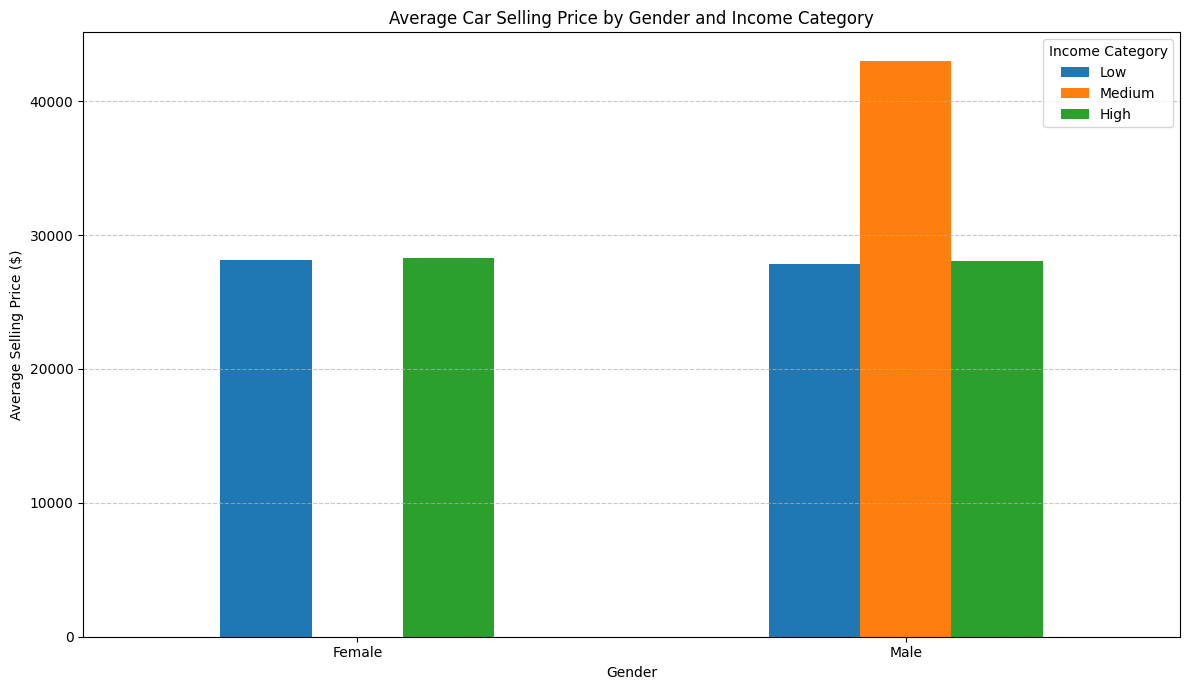

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average selling price by Gender and Income_Category
average_price_gender_income = df.groupby(['Gender', 'Income_Category'])['Price ($)'].mean().unstack()

print("Average selling price by Gender and Income Category:")
print(average_price_gender_income)

# Visualize the results
plt.figure(figsize=(12, 7))
sns.heatmap(average_price_gender_income, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
plt.title('Average Car Selling Price by Gender and Income Category')
plt.ylabel('Gender')
plt.xlabel('Income Category')
plt.tight_layout()
plt.show()

# Also create a grouped bar chart for comparison
plt.figure(figsize=(12, 7))
average_price_gender_income.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Average Car Selling Price by Gender and Income Category')
plt.ylabel('Average Selling Price ($)')
plt.xlabel('Gender')
plt.legend(title='Income Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?**

In [ ]:
cars_sold_by_region = df['Dealer_Region'].value_counts()

print("Total number of cars sold by region:")
print(cars_sold_by_region)

Total number of cars sold by region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


/tmp/ipython-input-1011462584.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette='viridis')


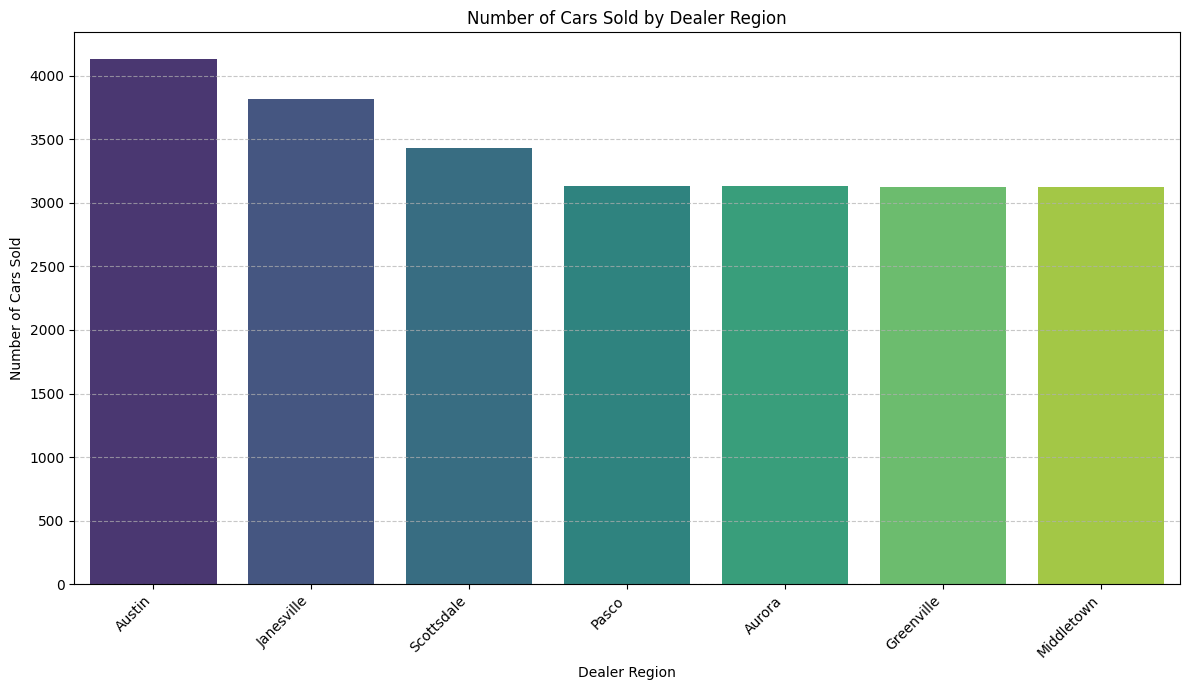

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette='viridis')
plt.title('Number of Cars Sold by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 8 How does the average car price differ between cars with different engine sizes?**

In [ ]:
average_price_by_engine = df.groupby('Engine')['Price ($)'].mean()

print("Average selling price by engine type:")
print(average_price_by_engine)

Average selling price by engine type:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


/tmp/ipython-input-4151402790.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_engine.index, y=average_price_by_engine.values, palette='viridis')


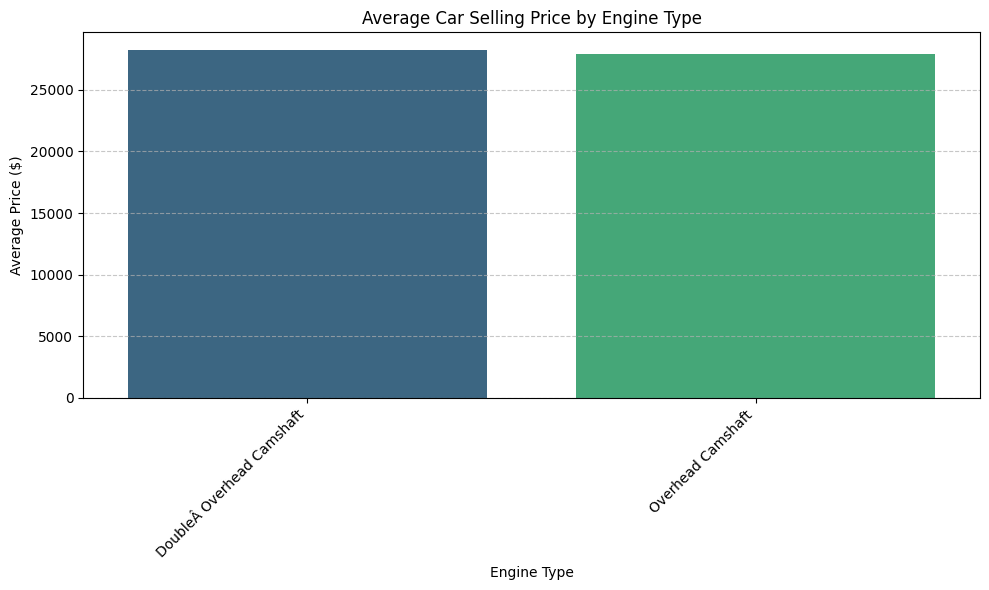

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_engine.index, y=average_price_by_engine.values, palette='viridis')
plt.title('Average Car Selling Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 9 How do car prices vary based on the customer’s annual income bracket?**

In [ ]:
average_price_by_income = df.groupby('Income_Category')['Price ($)'].mean()

print("Average car price by income bracket:")
print(average_price_by_income)

Average car price by income bracket:
Income_Category
Low       27884.297820
Medium    43000.000000
High      28147.761353
Name: Price ($), dtype: float64


/tmp/ipython-input-2110826761.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_income = df.groupby('Income_Category')['Price ($)'].mean()


#**QUESTION - 10  What are the top 5 car models with the highest number of sales, and how does their price distribution look**

In [ ]:
model_sales_count = df['Model'].value_counts()
top_5_models = model_sales_count.head(5)

print("Top 5 car models with the highest sales volume:")
print(top_5_models)

Top 5 car models with the highest sales volume:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


/tmp/ipython-input-4140632928.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Price ($)', data=df_top_5_models, palette='viridis')


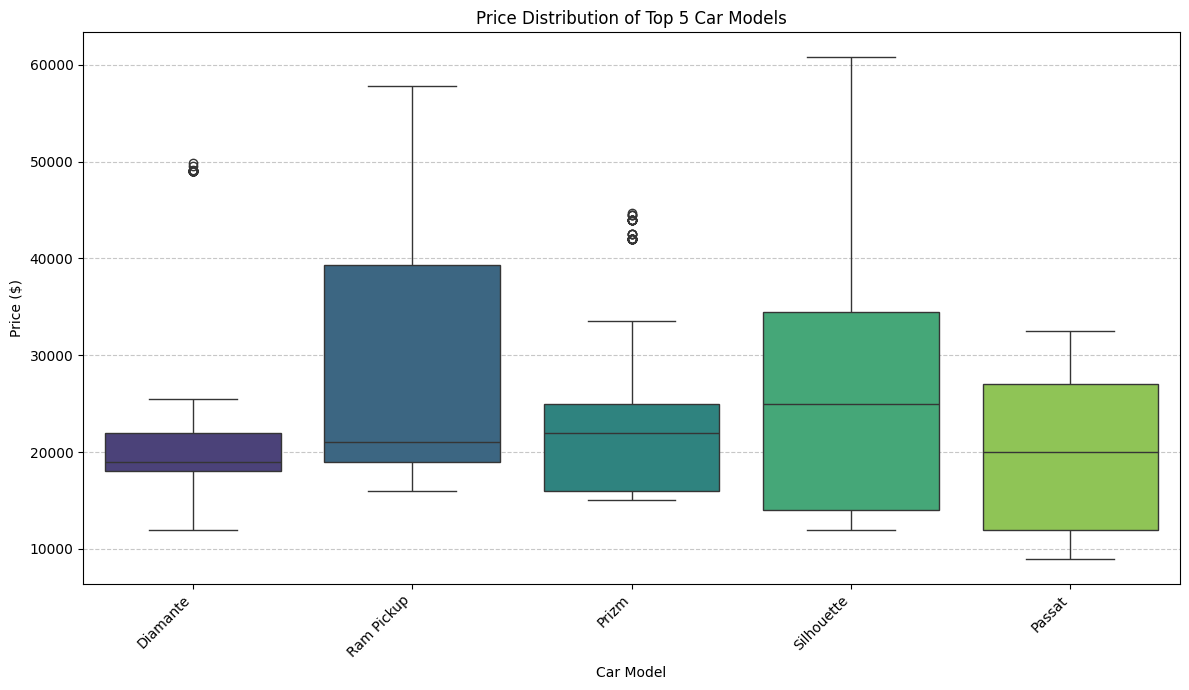

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only the top 5 models
top_5_model_names = top_5_models.index.tolist()
df_top_5_models = df[df['Model'].isin(top_5_model_names)]

# Visualize the price distribution of these top 5 models using a box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Model', y='Price ($)', data=df_top_5_models, palette='viridis')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
model_price_stats = df_top_5_models.groupby('Model')['Price ($)'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75)
]).rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'})

model_price_stats['IQR'] = model_price_stats['Q3'] - model_price_stats['Q1']

print("Descriptive statistics for selling prices of top 5 car models:")
print(model_price_stats)

Descriptive statistics for selling prices of top 5 car models:
                    mean   median           std    min    max       Q1  \
Model                                                                    
Diamante    22268.303828  19001.0   9770.768958  12000  49801  18000.0   
Passat      19600.728900  20000.0   8218.521683   9000  32501  12001.0   
Prizm       22838.457421  22000.0   8012.531045  15000  44700  16000.0   
Ram Pickup  27820.864230  21000.0  13297.609534  16000  57750  19000.0   
Silhouette  29858.513382  25000.0  17940.571762  12000  60750  14001.0   

                 Q3      IQR  
Model                         
Diamante    22000.0   4000.0  
Passat      27001.0  15000.0  
Prizm       25000.0   9000.0  
Ram Pickup  39300.0  20300.0  
Silhouette  34500.0  20499.0  


#**QUESTION - 11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?**

In [ ]:
average_price_by_engine_color = df.groupby(['Engine', 'Color'])['Price ($)'].mean()

print("Average car price by Engine and Color:")
print(average_price_by_engine_color)

Average car price by Engine and Color:
Engine                     Color     
DoubleÂ Overhead Camshaft  Black         25766.451103
                           Pale White    30347.987460
                           Red           27434.392314
Overhead Camshaft          Black         31732.967164
                           Pale White    24327.767694
                           Red           30153.405229
Name: Price ($), dtype: float64


In [ ]:
price_variation_by_color = df.groupby('Color')['Price ($)'].std()

print("Price variation (standard deviation) by Color:")
print(price_variation_by_color)

Price variation (standard deviation) by Color:
Color
Black         15286.065976
Pale White    14077.346859
Red           15519.360962
Name: Price ($), dtype: float64


In [ ]:
top_5_colors_by_variation = price_variation_by_color.nlargest(5)

print("Top 5 car colors with the highest price variation:")
print(top_5_colors_by_variation)

Top 5 car colors with the highest price variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


Average 'Price ($)' by Engine type and Top Colors:
Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  25766.451103  30347.987460  27434.392314
Overhead Camshaft          31732.967164  24327.767694  30153.405229


<Figure size 1200x700 with 0 Axes>

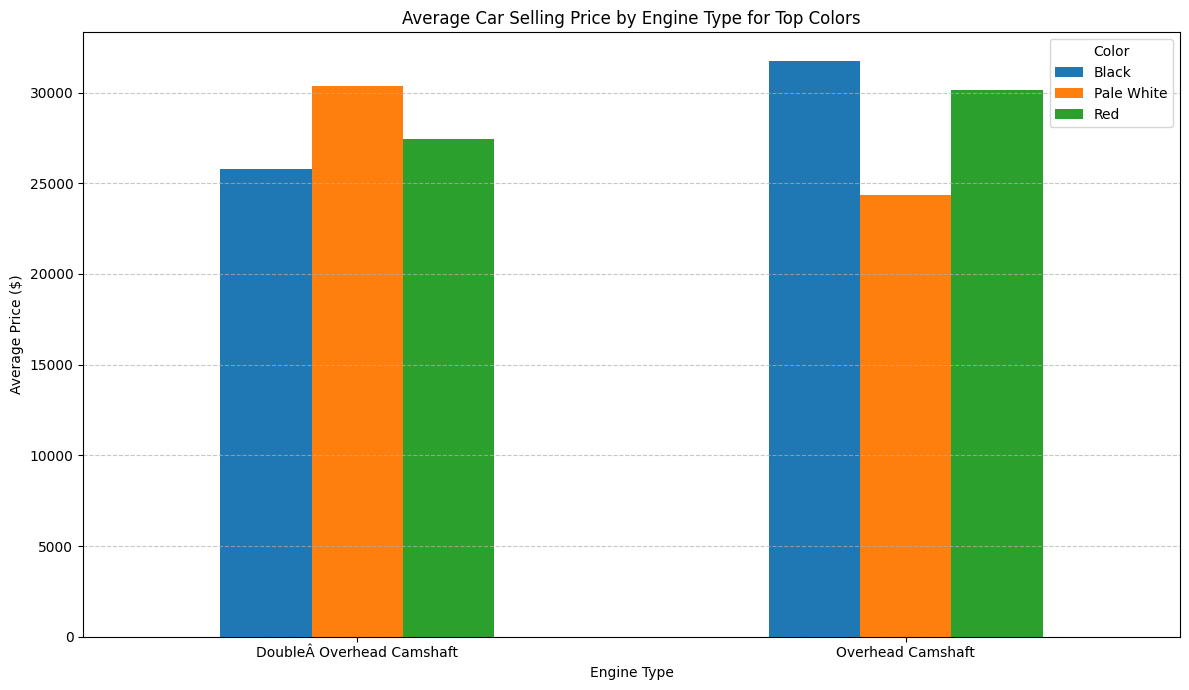

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract the names of the top colors with the highest price variation
top_colors = top_5_colors_by_variation.index.tolist()

# 2. Filter the original DataFrame df to include only the rows corresponding to these top colors
df_top_colors = df[df['Color'].isin(top_colors)]

# 3. Calculate the average 'Price ($)' for each combination of 'Engine' type and 'Color' for the filtered data
average_price_engine_color_top = df_top_colors.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

print("Average 'Price ($)' by Engine type and Top Colors:")
print(average_price_engine_color_top)

# 4. Create a grouped bar plot to visualize these average prices
plt.figure(figsize=(12, 7))
average_price_engine_color_top.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Average Car Selling Price by Engine Type for Top Colors')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.legend(title='Color')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION -12 Is there any seasonal trend in car sales based on the date of sale?**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].head())

0   2022-01-02
1   2022-01-02
2   2022-01-02
3   2022-01-02
4   2022-01-02
Name: Date, dtype: datetime64[ns]


In [ ]:
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

sales_by_month = df['Month'].value_counts().sort_index()
sales_by_quarter = df['Quarter'].value_counts().sort_index()

print("Car sales by month:")
print(sales_by_month)

print("\nCar sales by quarter:")
print(sales_by_quarter)

Car sales by month:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64

Car sales by quarter:
Quarter
1    3060
2    5265
3    6735
4    8846
Name: count, dtype: int64


In [ ]:
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

print("First 5 rows with new 'Month' and 'Quarter' columns:")
print(df[['Date', 'Month', 'Quarter']].head())

First 5 rows with new 'Month' and 'Quarter' columns:
        Date  Month  Quarter
0 2022-01-02      1        1
1 2022-01-02      1        1
2 2022-01-02      1        1
3 2022-01-02      1        1
4 2022-01-02      1        1


#**QUESTION - 13 How dOes the car price distribution change when considering different combinations of body style and transmission type?**

In [ ]:
body_style_transmission_price_stats = df.groupby(['Body Style', 'Transmission'])['Price ($)'].agg([
    'mean',
    'median',
    'std',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75)
]).rename(columns={'<lambda_0>': 'Q1', '<lambda_1>': 'Q3'})

body_style_transmission_price_stats['IQR'] = body_style_transmission_price_stats['Q3'] - body_style_transmission_price_stats['Q1']

print("Price distribution for each combination of Body Style and Transmission:")
print(body_style_transmission_price_stats)

Price distribution for each combination of Body Style and Transmission:
                                 mean   median           std       Q1  \
Body Style Transmission                                                 
Hardtop    Auto          31520.188210  27000.0  13687.756740  21001.0   
           Manual        27016.943698  22001.0  14072.501848  17575.5   
Hatchback  Auto          25910.544824  21500.0  13144.014337  18001.0   
           Manual        28702.550562  23000.0  16284.049616  17000.0   
Passenger  Auto          28915.835149  25000.0  13946.481932  19000.0   
           Manual        28969.521039  22000.0  18523.684163  16001.0   
SUV        Auto          27501.404407  25000.0  13299.927913  19000.0   
           Manual        26079.019161  22000.0  14621.526541  17000.0   
Sedan      Auto          29955.294344  26000.0  14310.910860  19000.0   
           Manual        29664.271572  25000.0  15440.056434  19001.0   

                              Q3      IQR  
Body St

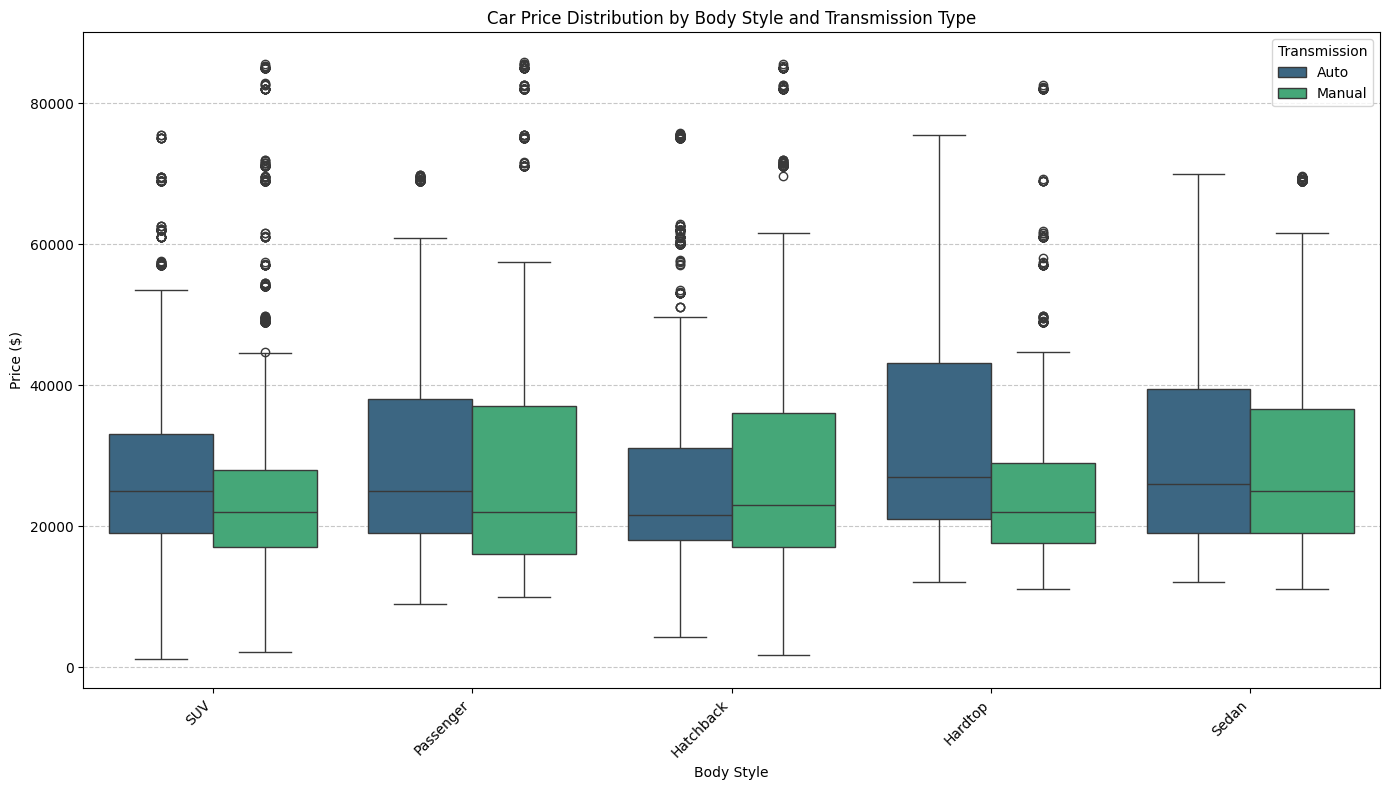

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='viridis')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transmission')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a new instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Engine' column to create 'Engine_encoded'
df['Engine_encoded'] = label_encoder.fit_transform(df['Engine'])

print("Engine column successfully encoded. First 5 rows with new 'Engine_encoded' column:")
print(df[['Engine', 'Engine_encoded']].head())

Engine column successfully encoded. First 5 rows with new 'Engine_encoded' column:
                      Engine  Engine_encoded
0  DoubleÂ Overhead Camshaft               0
1  DoubleÂ Overhead Camshaft               0
2          Overhead Camshaft               1
3          Overhead Camshaft               1
4  DoubleÂ Overhead Camshaft               0


In [ ]:
correlation_features = df[['Price ($)', 'Annual Income', 'Engine_encoded']]
correlation_matrix_subset = correlation_features.corr()

print("Correlation Matrix for Price ($), Annual Income, and Engine_encoded:")
print(correlation_matrix_subset)

Correlation Matrix for Price ($), Annual Income, and Engine_encoded:
                Price ($)  Annual Income  Engine_encoded
Price ($)        1.000000       0.012065       -0.011271
Annual Income    0.012065       1.000000       -0.006598
Engine_encoded  -0.011271      -0.006598        1.000000


#**QUESTION - 15 How does the average car price vary across different car models and engine types?**

In [ ]:
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()

print("Average car price by Model and Engine Type:")
print(average_price_by_model_engine)

Average car price by Model and Engine Type:
Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


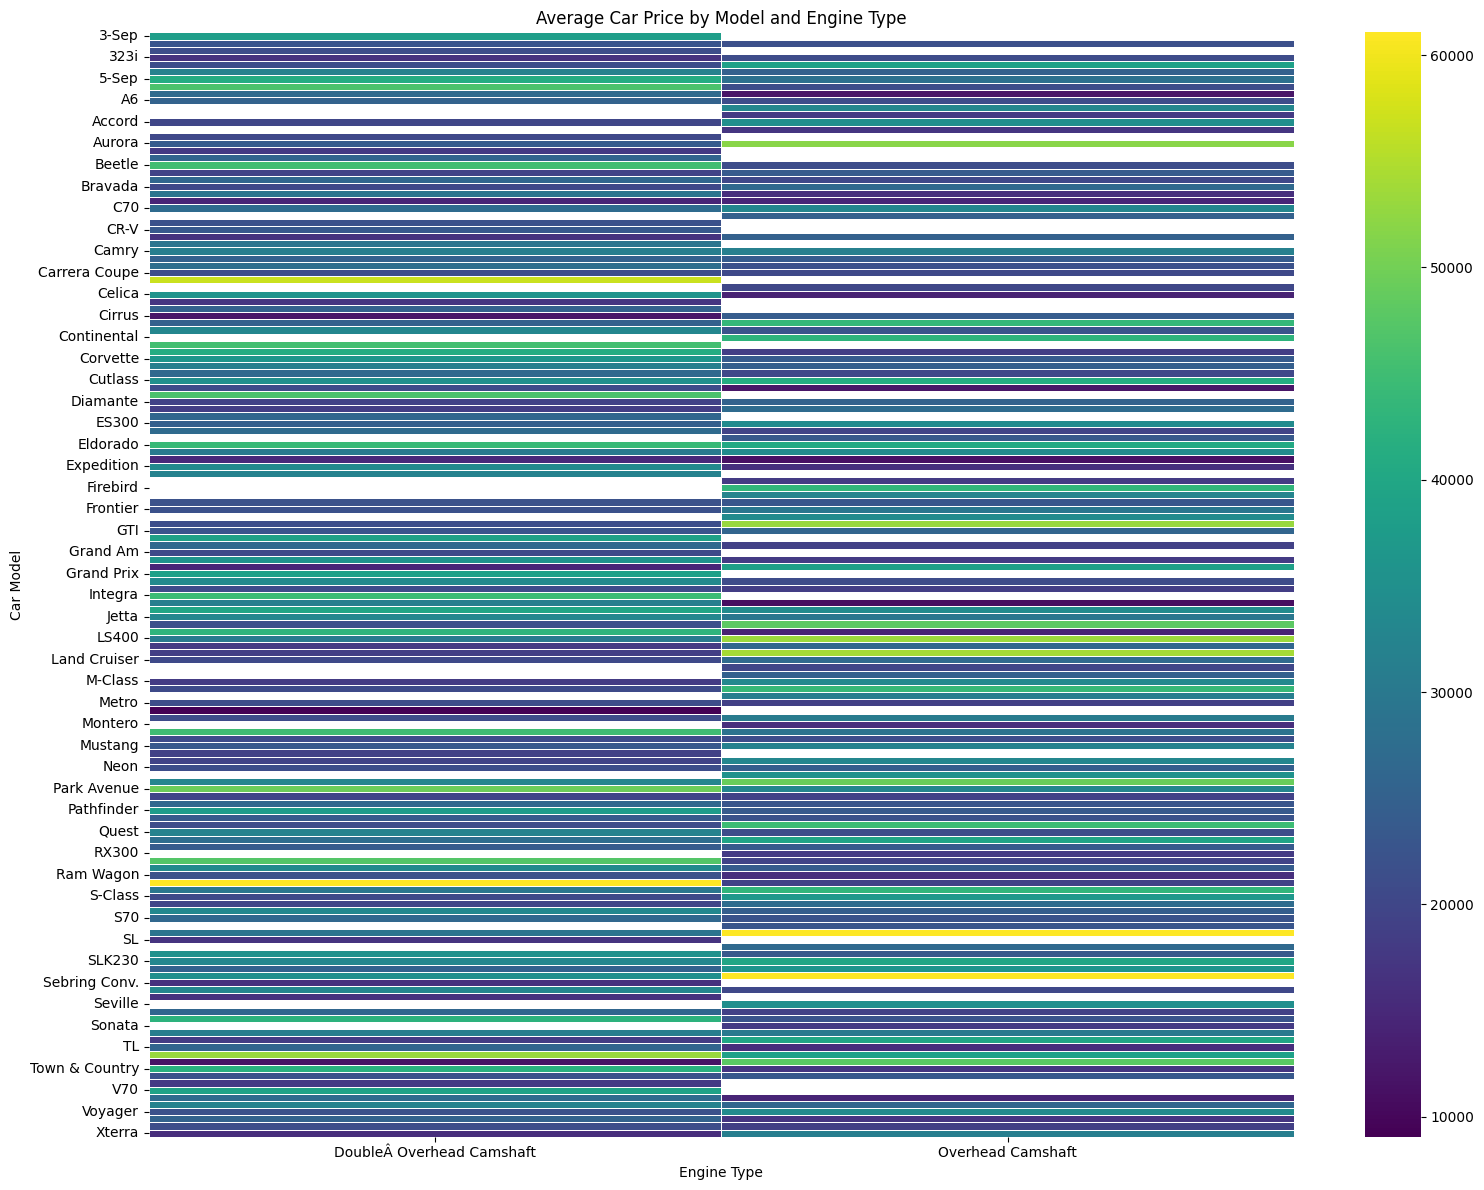

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convert the average_price_by_model_engine Series into a DataFrame suitable for a heatmap by unstacking the 'Engine' level.
heatmap_data = average_price_by_model_engine.unstack()

# 2. Create a heatmap using seaborn.heatmap()
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, annot=False, cmap='viridis', fmt=".0f", linewidths=.5)

# 3. Add a title to the heatmap
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')

# 4. Display the plot.
plt.tight_layout()
plt.show()

#**EDA - 3**
Amazon Sales Data

**Description:**

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

**Features:**

product_id: Unique identifier for each product

product_name: Name of the product

category: Category of the product

discounted_price: Discounted price of the product

actual_price: Actual price of the product

discount_percentage: Percentage of discount for the product

rating: Rating of the product (1-5)

rating_count: Number of people who voted for the Amazon rating

about_product: Description about the product

user_id: ID of the user who wrote the review

user_name: Name of the user who wrote the review

review_id: ID of the user review

review_title: Short review

review_content: Long review

img_link: Image link of the product

product_link: Official website link of the product




#**IMPORT CSV FILE**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


#**Display first five rows**

In [5]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['amazon.csv']))
print(df.head()) # Optional: display the first 5 rows

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

#**What is the average rating for each product category?**

In [ ]:
import pandas as pd
import io

# Assuming 'uploaded' contains 'amazon.csv' from a previous files.upload()
df = pd.read_csv(io.BytesIO(uploaded['amazon.csv']))

df['rating'] = df['rating'].astype(str).str.replace('|', '', regex=False).str.strip()
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

average_ratings_by_category = df.groupby('category')['rating'].mean()

print("\nTop 5 categories with the highest average ratings:")
print(average_ratings_by_category.nlargest(5))

print("\nTop 5 categories with the lowest average ratings:")
print(average_ratings_by_category.nsmallest(5))

NameError: name 'df' is not defined

#**QUESTION - 2 What are the top rating_count products by category?**

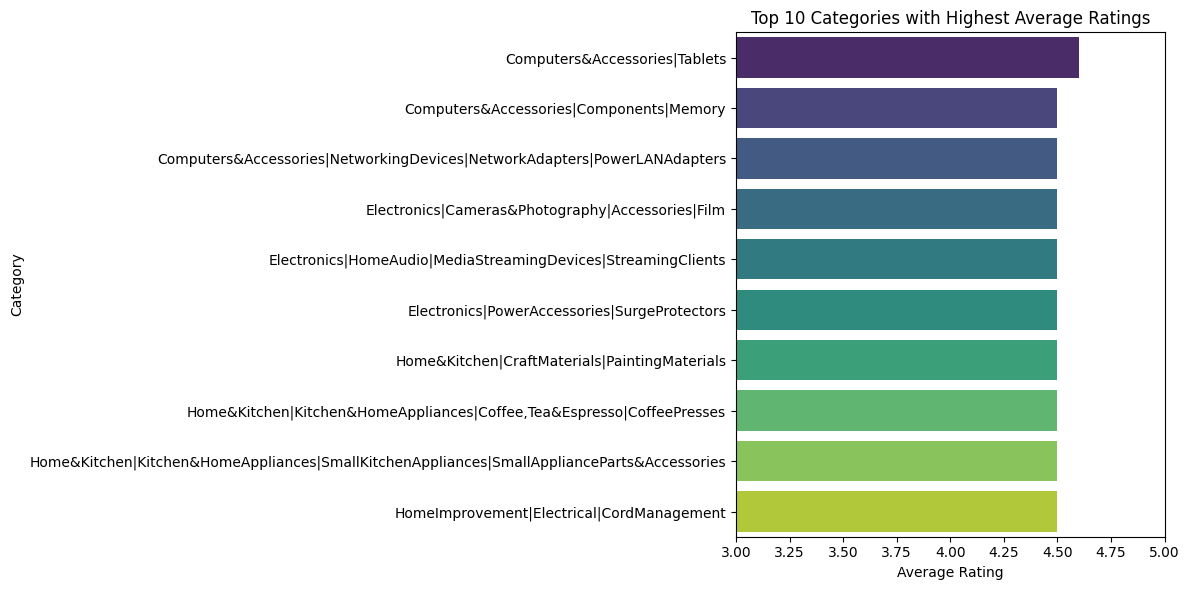

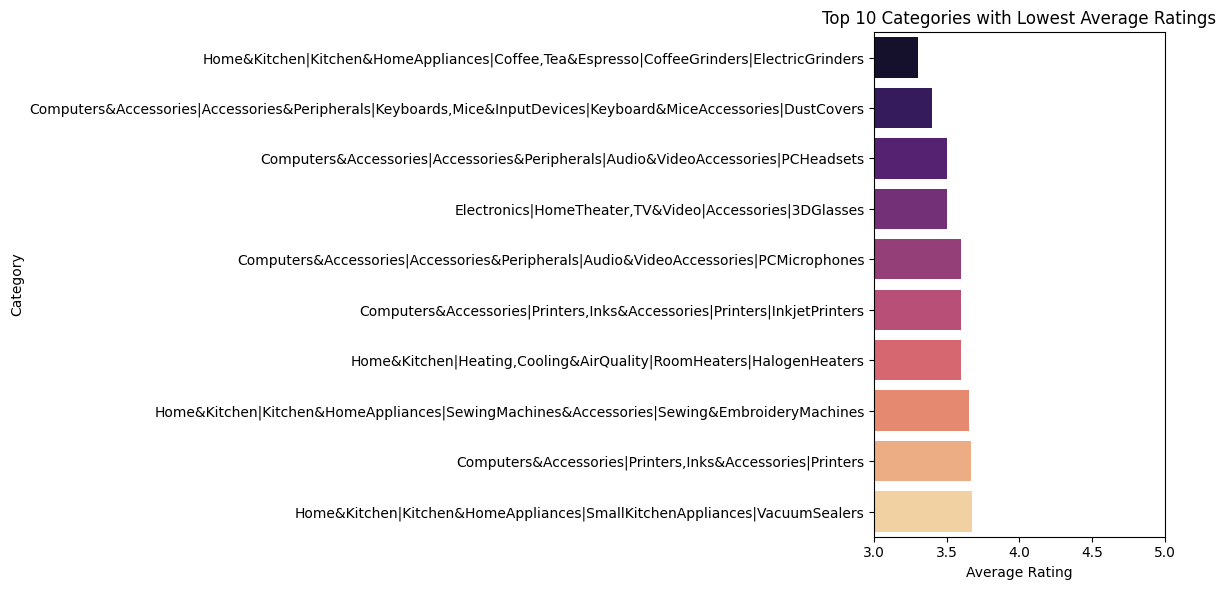

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 highest and lowest rated categories
top_10_highest_rated = average_ratings_by_category.nlargest(10)
top_10_lowest_rated = average_ratings_by_category.nsmallest(10)

# Plotting highest rated categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_highest_rated.values, y=top_10_highest_rated.index, palette='viridis', hue=top_10_highest_rated.index, legend=False)
plt.title('Top 10 Categories with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.xlim(3.0, 5.0) # Ratings are usually between 1-5
plt.tight_layout()
plt.show()

# Plotting lowest rated categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_lowest_rated.values, y=top_10_lowest_rated.index, palette='magma', hue=top_10_lowest_rated.index, legend=False)
plt.title('Top 10 Categories with Lowest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.xlim(3.0, 5.0) # Ratings are usually between 1-5
plt.tight_layout()
plt.show()

#**QUESTION - 3 What is the distribution of discounted prices vs. actual prices?**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and convert 'discounted_price' to numeric
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Clean and convert 'actual_price' to numeric
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Drop rows where price values are NaN after conversion
df_prices_cleaned = df.dropna(subset=['discounted_price', 'actual_price'])

print("Descriptive statistics for Discounted Price:")
display(df_prices_cleaned['discounted_price'].describe())

print("\nDescriptive statistics for Actual Price:")
display(df_prices_cleaned['actual_price'].describe())

# Plotting distributions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_prices_cleaned['discounted_price'], kde=True, color='skyblue')
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_prices_cleaned['actual_price'], kde=True, color='lightcoral')
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot to show relationship between discounted and actual prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df_prices_cleaned, alpha=0.5)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

#**QUESTION - 4 How does the average discount percentage vary across categories**

In [ ]:
average_discount_by_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

print("Average discount percentage by category (Top 10):")
print(average_discount_by_category.head(10))

print("\nAverage discount percentage by category (Bottom 10):")
print(average_discount_by_category.tail(10))

Average discount percentage by category (Top 10):
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                       90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                               90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                              90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                              88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    87.5
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts                                       82.0
Computers&Accessories|Components|InternalHardDrives                                                              80.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                          78

#**QUESTION - 5 What are the most popular product names?**

In [ ]:
# Sort the DataFrame by 'rating_count' in descending order
most_popular_products = df_cleaned.sort_values(by='rating_count', ascending=False)

print("Top 10 most popular product names by rating count:")
display(most_popular_products[['product_name', 'rating_count']].head(10))

Top 10 most popular product names by rating count:


,product_name,rating_count
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
566,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",313832.0


#**QUESTION -6 What are the most popular product keywords?**

In [ ]:
df['product_name'] = df['product_name'].fillna('')
df['about_product'] = df['about_product'].fillna('')
df['combined_text'] = df['product_name'] + ' ' + df['about_product']

print("New 'combined_text' column created by combining 'product_name' and 'about_product'.")
print("First 5 rows of the new column:")
print(df[['product_name', 'about_product', 'combined_text']].head())

New 'combined_text' column created by combining 'product_name' and 'about_product'.
First 5 rows of the new column:
                                        product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  Sounce Fast Phone Charging Cable & Data Sync U...   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                       combined_text  
0  Wayona Nylon Braided USB to Lightning Fast Cha...  
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...  
2  Sounce Fast Phone Charging Cable & Data Sy

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Ensure necessary NLTK data are downloaded
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) # Explicitly download punkt_tab

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers
    tokens = nltk.word_tokenize(text) # Tokenize
    tokens = [word for word in tokens if word not in stop_words] # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # Lemmatize
    return ' '.join(tokens)

# Apply preprocessing to the combined_text column
df['processed_text'] = df['combined_text'].apply(preprocess_text)

print("Text preprocessing completed and 'processed_text' column created.")
print("First 5 rows of 'processed_text':")
print(df['processed_text'].head())

Text preprocessing completed and 'processed_text' column created.
First 5 rows of 'processed_text':
0    wayona nylon braided usb lightning fast chargi...
1    ambrane unbreakable w fast charging braided ty...
2    sounce fast phone charging cable data sync usb...
3    boat deuce usb typec micro usb stress resistan...
4    portronics konnect l fast charging pin usb cab...
Name: processed_text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the processed text
x = vectorizer.fit_transform(df['processed_text'])

# Get feature names (words)
words = vectorizer.get_feature_names_out()

# Sum up the counts of each word
word_counts = x.sum(axis=0)

# Create a dictionary of word frequencies
word_freq = dict(zip(words, word_counts.tolist()[0]))

# Convert to a pandas Series for easy sorting and display
word_freq_series = pd.Series(word_freq)

# Get the top 20 most frequent words
top_keywords = word_freq_series.nlargest(20)

print("Top 20 most popular product keywords:")
print(top_keywords)

Top 20 most popular product keywords:
usb           1400
cable         1347
charging       870
device         803
type           593
fast           579
warranty       576
power          559
black          552
compatible     528
year           528
design         502
battery        500
water          500
tv             489
charge         476
use            474
data           459
easy           452
speed          450
dtype: int64


#**QUESTION -7  What are the most popular product reviews**

In [ ]:
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

print("The 'rating_count' column has been cleaned and converted to numeric.")
print(df['rating_count'].head())

The 'rating_count' column has been cleaned and converted to numeric.
0    24269.0
1    43994.0
2     7928.0
3    94363.0
4    16905.0
Name: rating_count, dtype: float64


In [ ]:
print("Review Titles and Content for the Top 10 Most Popular Products:")
for index, row in top_products_by_rating_count.head(10).iterrows():
    print(f"\nProduct Name: {row['product_name']}")
    print(f"  Review Title(s): {row['review_title']}")
    print(f"  Review Content: {row['review_content']}")

Review Titles and Content for the Top 10 Most Popular Products:

Product Name: Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
  Review Title(s): It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase
  Review Content: I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better look other options.,

#**QUESTION- 8  What is the correlation between discounted_price and rating**

In [ ]:
correlation = df['discounted_price'].corr(df['rating'])

print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")

NameError: name 'df' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.title('Discounted Price vs. Rating')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

#**QUESTION - 9 What are the Top 5 categories based on the highest ratings?**

#**QUESTION - 10 Identify any potential areas for improvement or optimization based on the data analysis?**

In [ ]:
print(missing_info)

                   Missing Values  Percentage Missing
ex_showroom_price             435           40.999057
selling_price                   0            0.000000
name                            0            0.000000
year                            0            0.000000
seller_type                     0            0.000000
owner                           0            0.000000
km_driven                       0            0.000000


#**EDA 3 IS COMPLETED**

#EDA - 4

**Description of the Dataset:**

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.


**Application in Data Science:**

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers

In [14]:
from google.colab import files
uploaded = files.upload()


Saving spotify.csv to spotify.csv


In [15]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['spotify.csv']))

# Display the first 5 rows of the DataFrame
print(df.head())



  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


#**QUESTION - 1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then dothe needful**

In [21]:
duplicate_rows = df[df.duplicated(keep=False)]
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows found: {num_duplicate_rows}")

Number of duplicate rows found: 0


In [26]:
print(df.shape)

(413, 5)


#**QUESTION - 2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram**

In [24]:
average_popularity_by_artist = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
top_10_artists = average_popularity_by_artist.head(10)

print("Top 10 most popular artists based on average track popularity:")
print(top_10_artists)

Top 10 most popular artists based on average track popularity:
Artist
cassö             92.000000
Trueno            89.000000
David Guetta      87.000000
Travis Scott      86.555556
¥$                85.100000
Anuel AA          85.000000
Post Malone       85.000000
Kendrick Lamar    84.500000
Metro Boomin      84.428571
Dua Lipa          84.000000
Name: Popularity, dtype: float64


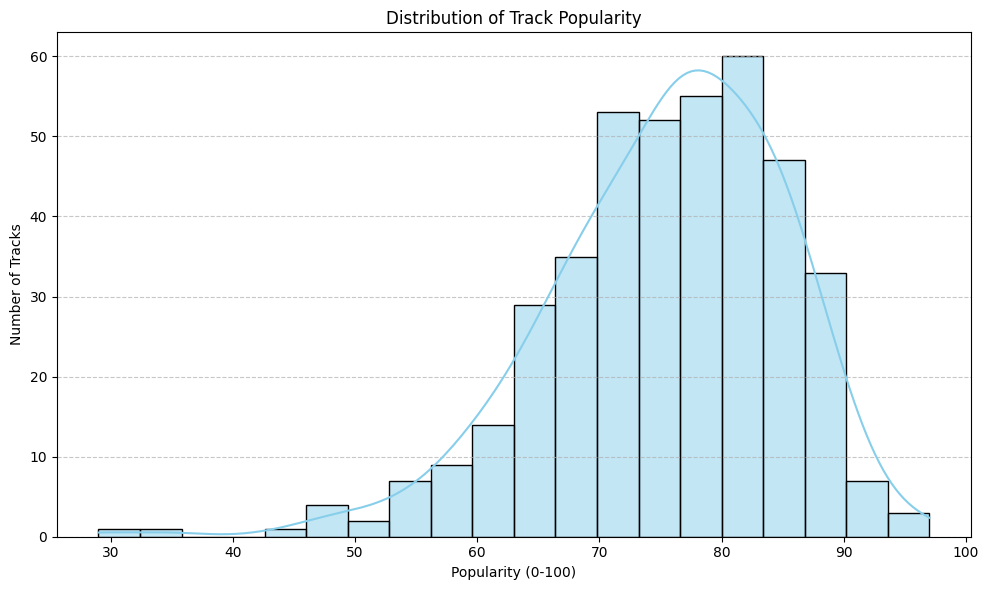

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity (0-100)')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

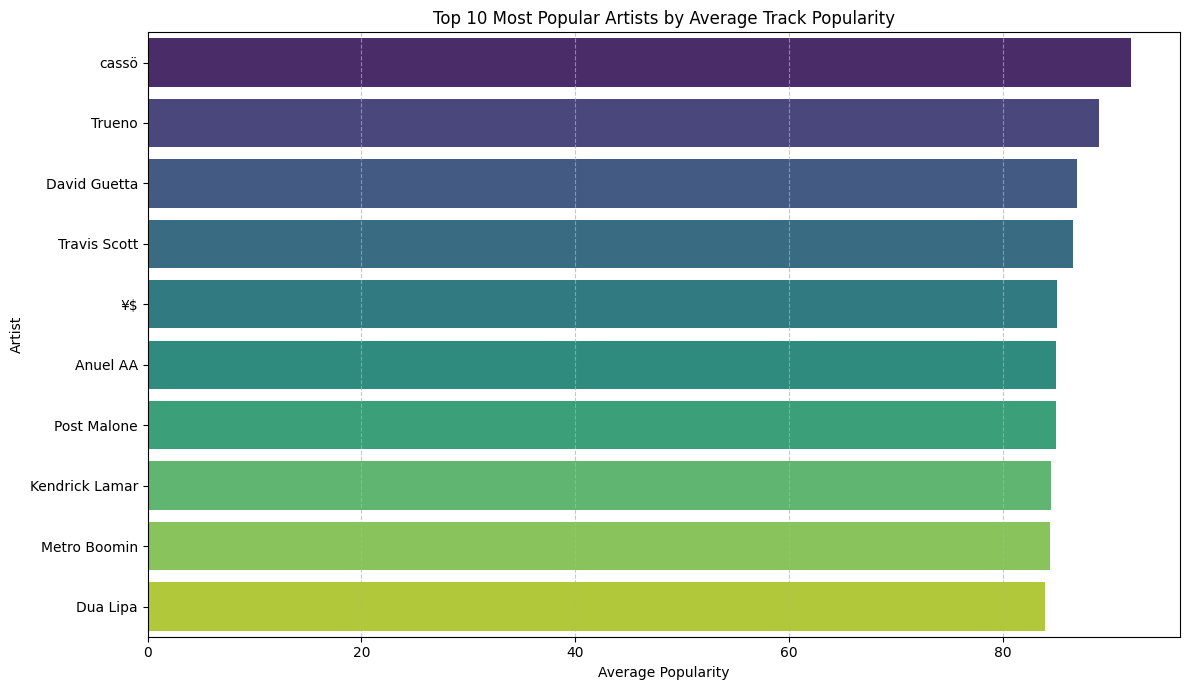

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_artists.values, y=top_10_artists.index, palette='viridis', hue=top_10_artists.index, legend=False)
plt.title('Top 10 Most Popular Artists by Average Track Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION -3 is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot**

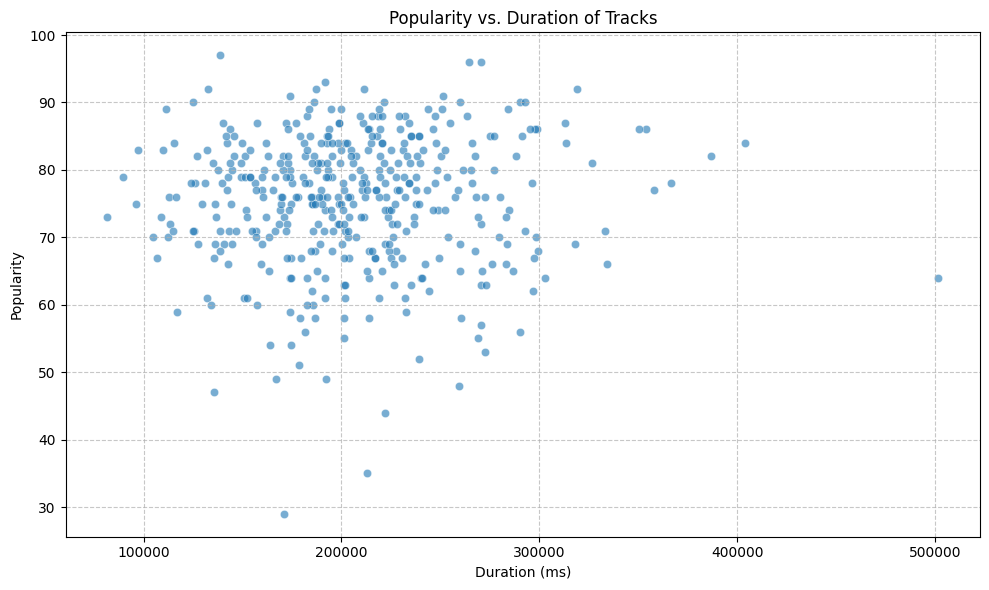

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, alpha=0.6)
plt.title('Popularity vs. Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot**

In [40]:
artist_track_counts = df['Artist'].value_counts()

print("Artist with the highest number of tracks:")
print(artist_track_counts.head(1))

print("\nCounts of tracks for each artist (top 10):")
print(artist_track_counts.head(10))

Artist with the highest number of tracks:
Artist
Drake    17
Name: count, dtype: int64

Counts of tracks for each artist (top 10):
Artist
Drake           17
Eminem          11
Lil Nas X       10
JAY-Z           10
21 Savage       10
Flo Rida        10
¥$              10
Timbaland       10
Ludacris        10
Travis Scott     9
Name: count, dtype: int64


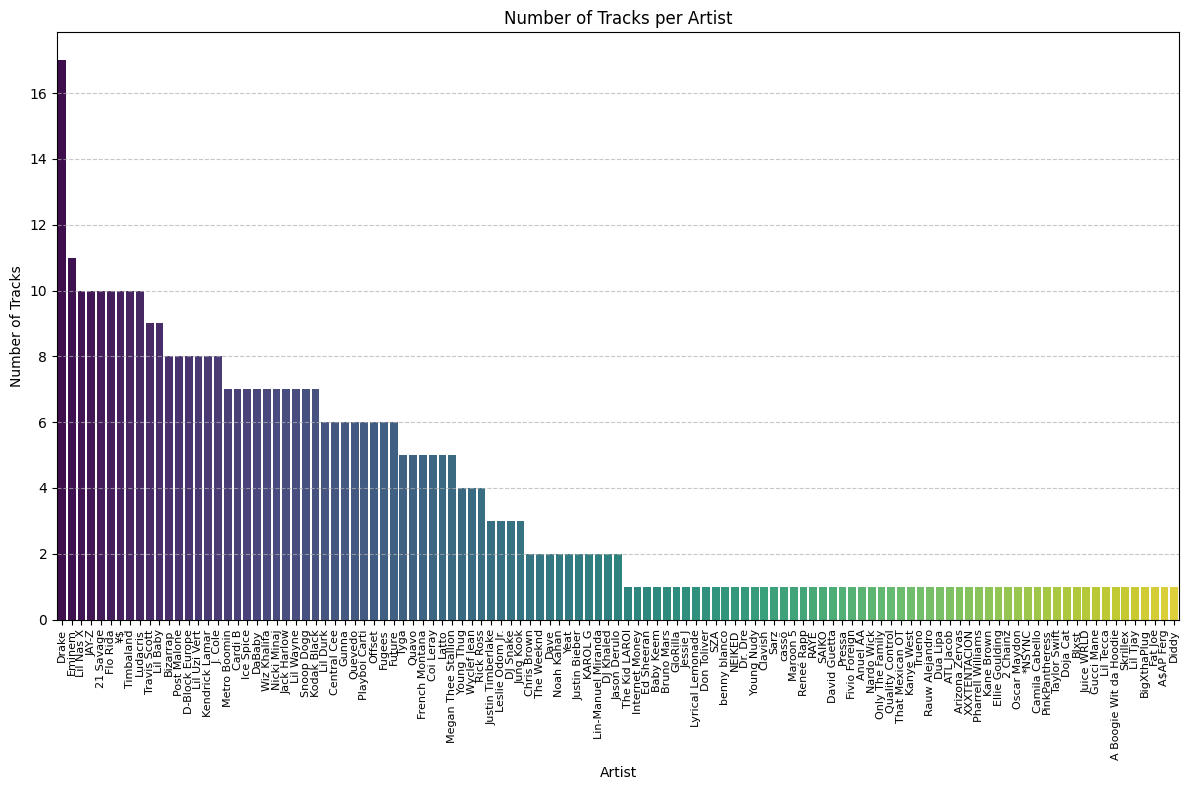

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=artist_track_counts.index, y=artist_track_counts.values, palette='viridis', hue=artist_track_counts.index, legend=False)
plt.title('Number of Tracks per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90, fontsize=8) # Rotate labels for better readability if many artists
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION - 5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each**

In [38]:
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)

print("Top 5 least popular tracks:")
for index, row in least_popular_tracks.iterrows():
    print(f"- Artist: {row['Artist']}, Track: {row['Track Name']}")

Top 5 least popular tracks:
- Artist: Pressa, Track: Attachments (feat. Coi Leray)
- Artist: Justin Bieber, Track: Intentions
- Artist: French Montana, Track: Splash Brothers
- Artist: Lil Baby, Track: On Me - Remix
- Artist: Wyclef Jean, Track: 911 (feat. Mary J. Blige)


#**QUESTION - 6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist**

In [29]:
# The 'average_popularity_by_artist' is already sorted in descending order from a previous step.
# So, the top 5 artists will naturally be the first 5 entries.
top_5_artists = average_popularity_by_artist.head(5)

print("Top 5 most popular artists by average track popularity:")
print(top_5_artists)

# The artist with the highest average popularity among the top 5 is the first one in the sorted list
highest_avg_popularity_artist = top_5_artists.index[0]
highest_avg_popularity_value = top_5_artists.iloc[0]

print(f"\nAmong the top 5 most popular artists, '{highest_avg_popularity_artist}' has the highest average popularity with a score of {highest_avg_popularity_value:.2f}.")

Top 5 most popular artists by average track popularity:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

Among the top 5 most popular artists, 'cassö' has the highest average popularity with a score of 92.00.


#**QUESTION-7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist**

In [30]:
top_5_artist_names = top_5_artists.index.tolist()
df_top_artists = df[df['Artist'].isin(top_5_artist_names)]

print("DataFrame containing only tracks by the top 5 artists created.")
print("First 5 rows of df_top_artists:")
print(df_top_artists.head())
print(f"Number of tracks by top 5 artists: {len(df_top_artists)}")

DataFrame containing only tracks by the top 5 artists created.
First 5 rows of df_top_artists:
          Artist                  Track Name  Popularity  Duration (ms)  \
7   Travis Scott      MELTDOWN (feat. Drake)          86         246133   
30  Travis Scott  FE!N (feat. Playboi Carti)          93         191700   
31  Travis Scott                    I KNOW ?          92         211582   
32  Travis Scott                     MY EYES          91         251249   
33  Travis Scott                  goosebumps          89         243836   

                  Track ID  
7   67nepsnrcZkowTxMWigSbb  
30  42VsgItocQwOQC3XWZ8JNA  
31  6wsqVwoiVH2kde4k4KKAFU  
32  4kjI1gwQZRKNDkw1nI475M  
33  6gBFPUFcJLzWGx4lenP6h2  
Number of tracks by top 5 artists: 22


In [37]:
most_popular_tracks_by_artist = df_top_artists.loc[df_top_artists.groupby('Artist')['Popularity'].idxmax()]

print("Most popular track for each of the top 5 artists:")
for index, row in most_popular_tracks_by_artist.iterrows():
    print(f"- Artist: {row['Artist']}, Track: {row['Track Name']}, Popularity: {row['Popularity']}")

Most popular track for each of the top 5 artists:
- Artist: David Guetta, Track: Baby Don't Hurt Me, Popularity: 87
- Artist: Travis Scott, Track: FE!N (feat. Playboi Carti), Popularity: 93
- Artist: Trueno, Track: Mamichula - con Nicki Nicole, Popularity: 89
- Artist: cassö, Track: Prada, Popularity: 92
- Artist: ¥$, Track: CARNIVAL, Popularity: 96


#**QUESTION - 8 Visualize relationships between multiple numerical variables simultaneously using a pair plot**

<Figure size 1000x800 with 0 Axes>

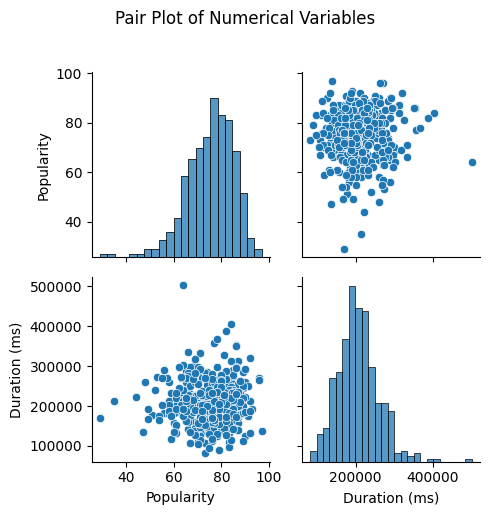

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the pair plot
numerical_df = df[['Popularity', 'Duration (ms)']]

# Create the pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(numerical_df)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02) # Add a title to the pair plot
plt.tight_layout()
plt.show()


#**QUESTION -9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot**

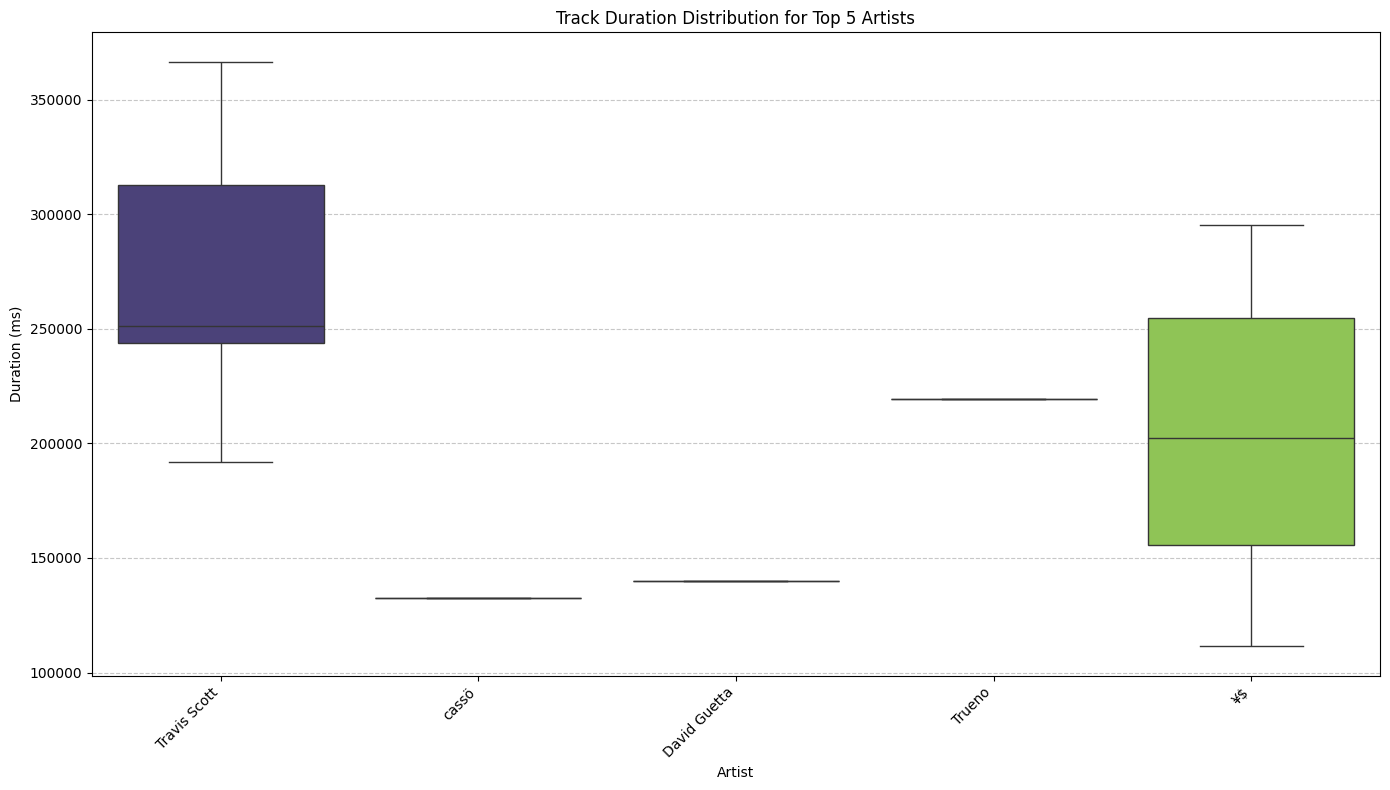

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(x='Artist', y='Duration (ms)', hue='Artist', data=df_top_artists, palette='viridis', legend=False)
plt.title('Track Duration Distribution for Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**QUESTION -10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot**

/tmp/ipython-input-2351589650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=df_top_artists, palette='viridis', inner='quartile')


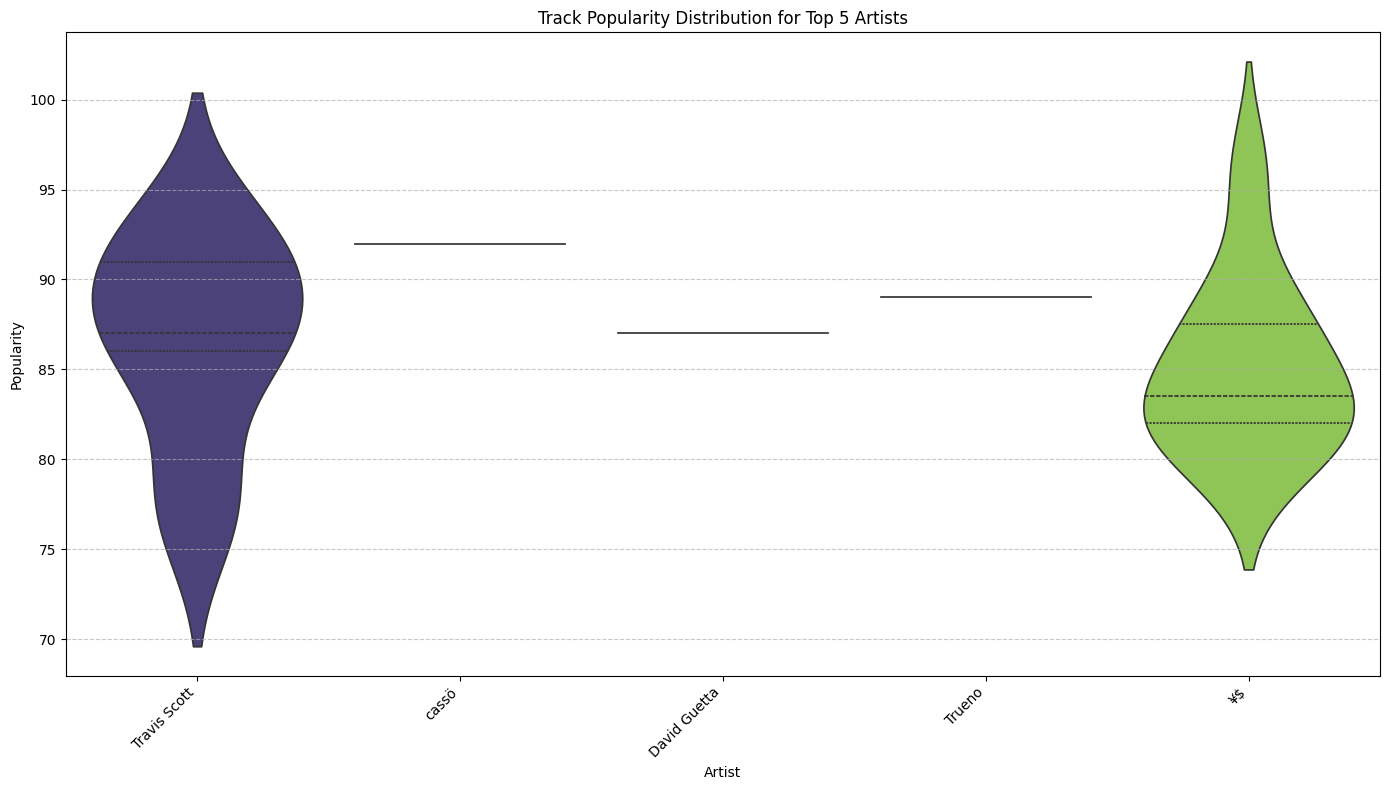

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.violinplot(x='Artist', y='Popularity', data=df_top_artists, palette='viridis', inner='quartile')
plt.title('Track Popularity Distribution for Top 5 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()